In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import time
import ipywidgets as wg
from ipywidgets import interact
from IPython.display import display
import networkx as nx

In [27]:
style.use('seaborn-white')

In [28]:
seed = 0
TIME = 120
NUM_AGENTS = 500

### Load data

In [29]:
infection_states = []
for idx in range(TIME):
    infection_states.append(nx.read_graphml("measurements/{}-network_time{}.graphml".format(seed, idx), node_type=int))

# The results

In [35]:
pos = nx.spring_layout(infection_states[0])

In [41]:
def plot_model(t):
    network = infection_states[t]
    color_map = []
    for idx, node in enumerate(network):
        if network.nodes[idx]['agent'] == 's':
            color_map.append('blue')
        elif network.nodes[idx]['agent'] == 'i1':
            color_map.append('pink')
        elif network.nodes[idx]['agent'] == 'i2':
            color_map.append('red')
        elif network.nodes[idx]['agent'] == 'c':
            color_map.append('brown')
        elif network.nodes[idx]['agent'] == 'd':
            color_map.append('black')
        elif network.nodes[idx]['agent'] == 'r':
            color_map.append('grey')
    nx.draw(network, pos=pos, node_color=color_map, with_labels=True)

In [42]:
time_period = wg.IntSlider(description='Time step', min=0, max=TIME-1)
wg.interact(plot_model, t=time_period)

interactive(children=(IntSlider(value=0, description='Time step', max=119), Output()), _dom_classes=('widget-i…

<function __main__.plot_model(t)>

### Curve graph

In [38]:
susceptible_ot = []
infected_1_ot = []
infected_2_ot = []
critical_ot = []
dead_ot = []
recovered_ot = []

for t in range(TIME):
    network = infection_states[t]
    susceptible = 0
    infected_1 = 0
    infected_2 = 0
    critical = 0
    dead = 0
    recovered = 0
    for idx, node in enumerate(network):
        if network.nodes[idx]['agent'] == 's':
            susceptible += 1
        elif network.nodes[idx]['agent'] == 'i1':
            infected_1 += 1
        elif network.nodes[idx]['agent'] == 'i2':
            infected_2 += 1
        elif network.nodes[idx]['agent'] == 'c':
            critical += 1
        elif network.nodes[idx]['agent'] == 'd':
            dead += 1
        elif network.nodes[idx]['agent'] == 'r':
            recovered +=1
    
    susceptible_ot.append(susceptible / float(NUM_AGENTS))
    infected_1_ot.append(infected_1 / float(NUM_AGENTS))
    infected_2_ot.append(infected_2 / float(NUM_AGENTS))
    critical_ot.append(critical / float(NUM_AGENTS))
    dead_ot.append(dead / float(NUM_AGENTS))
    recovered_ot.append(recovered / float(NUM_AGENTS))

(0, 1.0)

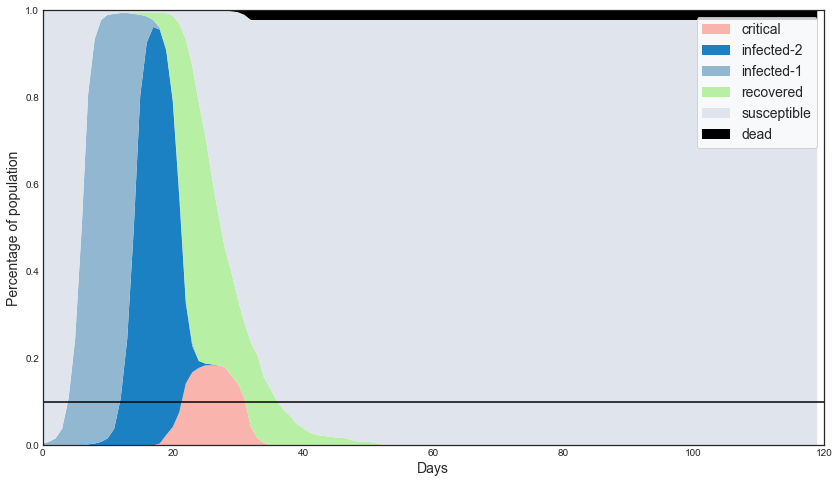

In [40]:
fig, ax = plt.subplots(figsize=(14,8))

x = [x for x in range(TIME)]

labels = ['critical', 'infected-2', 'infected-1', 'recovered', 'susceptible', 'dead']

y = np.vstack([critical_ot, infected_2_ot, infected_1_ot, recovered_ot, susceptible_ot, dead_ot])

ax.axhline(0.1, color='black')

pal = ["#f9b4ad", "#1b81c2", "#91b7d1", "#b7f0a5", "#e0e4ec","#000000"]

ax.stackplot(x, y, colors= pal, labels=labels)
ax.legend(loc='best', fontsize='14', frameon=True)
ax.set_ylabel('Percentage of population', fontsize='14')
ax.set_xlabel('Days', fontsize='14')

plt.xlim([0,TIME])
plt.ylim([0, 1.0])

#fig.savefig('measurements/the_curve.png')